# Cifar-10 Image Classification Dataset

Source - https://www.cs.toronto.edu/~kriz/cifar.html
---
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The labels are as follow :
1. airplane										
2. automobile										
3. bird										
4. cat										
5. deer										
6. dog										
7. frog										
8. horse										
9. ship										
10. truck

**Objective**: To classify the given image into one of the 10 given labels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

D:\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
labels = {0: "airplane",
          1: "automobile",
          2: "bird",
          3: "cat",
          4: "deer",
          5: "dog",
          6: "frog",
          7: "horse",
          8: "ship",
          9: "truck"}    

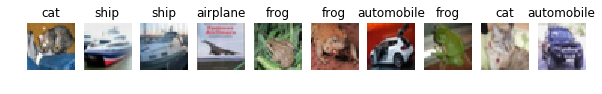

In [4]:
img_nums = 10
plt.figure(figsize=(10,3))
for i in range(0, img_nums):
  ax = plt.subplot(1, 10, i+1)
  plt.imshow(x_test[i])
  ax.set_title(str(labels[y_test[i][0]]))
  ax.axis("off")
plt.show()

In [5]:
num_classes = 10
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

## ConvNet

In [7]:
def convnet():
  model = Sequential([
  Conv2D(32, (3, 3), padding="same",activation="relu",kernel_regularizer=l2(0.01), input_shape=x_train.shape[1:]),
  Conv2D(32, (3, 3),kernel_regularizer=l2(0.01), activation="relu"),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Conv2D(64, (3, 3), padding="same", activation="relu",kernel_regularizer=l2(0.01)),
  Conv2D(64, (3, 3), activation="relu",kernel_regularizer=l2(0.01)),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Conv2D(128, (3, 3), padding="same", activation="relu",kernel_regularizer=l2(0.01)),
  Conv2D(128, (3, 3), activation="relu",kernel_regularizer=l2(0.01)),
  Flatten(),
  Dense(1024, activation="relu"),
  Dropout(0.5),
  Dense(512, activation="relu"),
  Dropout(0.5),
  Dense(num_classes, activation="softmax"),
  ])
  return model

In [8]:
model = convnet()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
__________

In [9]:
epochs = 50
batch_size = 256
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                  validation_data=(x_test, y_test_one_hot),
                  shuffle=True, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 215us/step - loss: 5.2950 - acc: 0.2542 - val_loss: 4.6504 - val_acc: 0.3932
Epoch 2/50
50000/50000 [==============================] - 8s 168us/step - loss: 4.3238 - acc: 0.4058 - val_loss: 3.9868 - val_acc: 0.4527
Epoch 3/50
50000/50000 [==============================] - 8s 168us/step - loss: 3.7050 - acc: 0.4694 - val_loss: 3.4536 - val_acc: 0.4987
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 3.2452 - acc: 0.5190 - val_loss: 3.0484 - val_acc: 0.5362
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.8778 - acc: 0.5587 - val_loss: 2.7212 - val_acc: 0.5660
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.5813 - acc: 0.5947 - val_loss: 2.4440 - val_acc: 0.6087
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.3394 - acc: 0.6233 - val_loss: 2.1914 -

In [11]:
scores = model.evaluate(x_test, y_test_one_hot, batch_size=256, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

10000/10000 [==============================] - 1s 59us/step

Test result: 82.830 loss: 0.857


In [12]:
model.save('cifar-10-model.h5')

In [13]:
y_pred = model.predict(x_test)

In [14]:
y_pred_label = np.argmax(y_pred, axis=1)

## Confusion Matrix

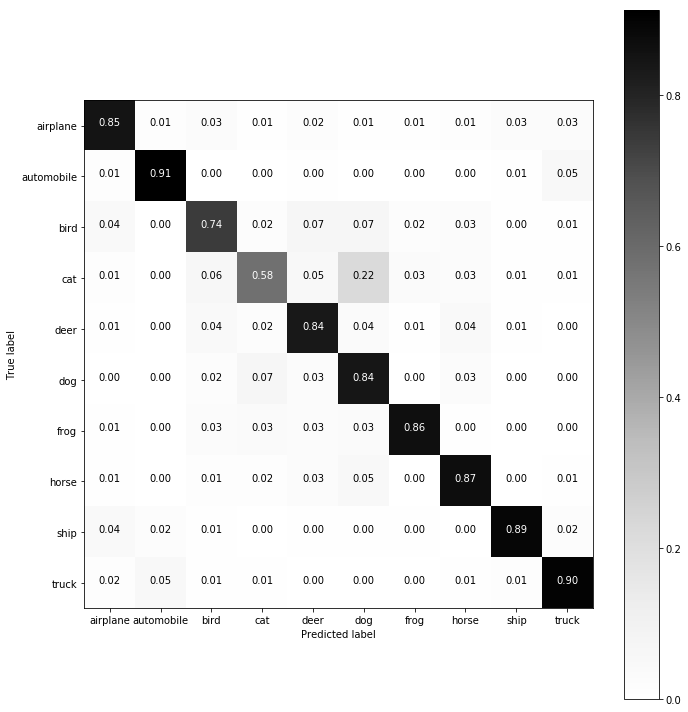

In [15]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_label)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
tick_marks = np.arange(10)
plt.xticks(tick_marks, [labels[i] for i in range(10)])
plt.yticks(tick_marks, [labels[i] for i in range(10)])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()

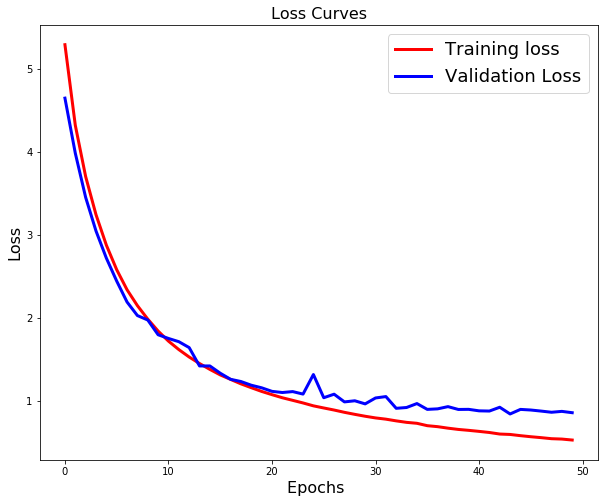

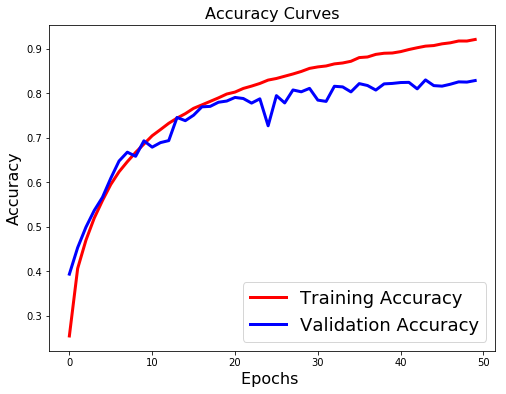

In [16]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16);

## Prediction

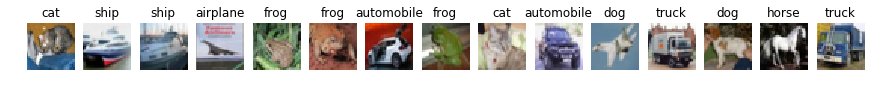

In [17]:
num_imgs = 15
plt.figure(figsize=(15,1))
for i in range(0, num_imgs):
  ax = plt.subplot(1, 15, i+1)
  plt.imshow(x_test[i])
  ax.set_title(str(labels[y_pred_label[i]]))
  ax.axis("off")
plt.show()